# Importing Libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from utils import *

# Importing The Dataset

In [30]:
df = pd.read_csv('../data/Iris.xls')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing the dataset

In [31]:
# delete the ID column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# Encode the target labels
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [17]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis (EDA)

In [18]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
# Summary statistics of the numerical columns
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


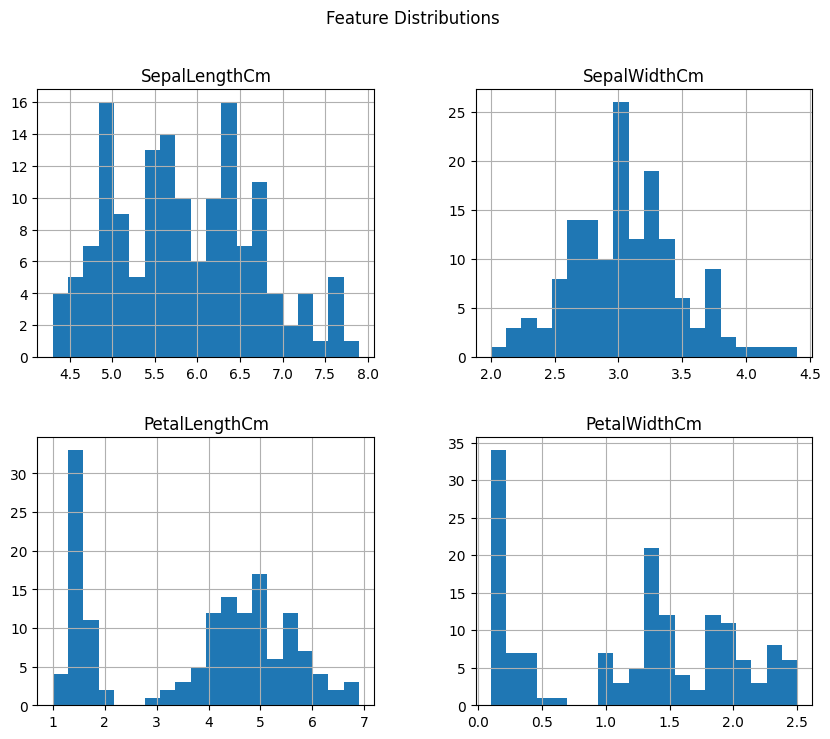

In [5]:
# Histograms for numerical features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

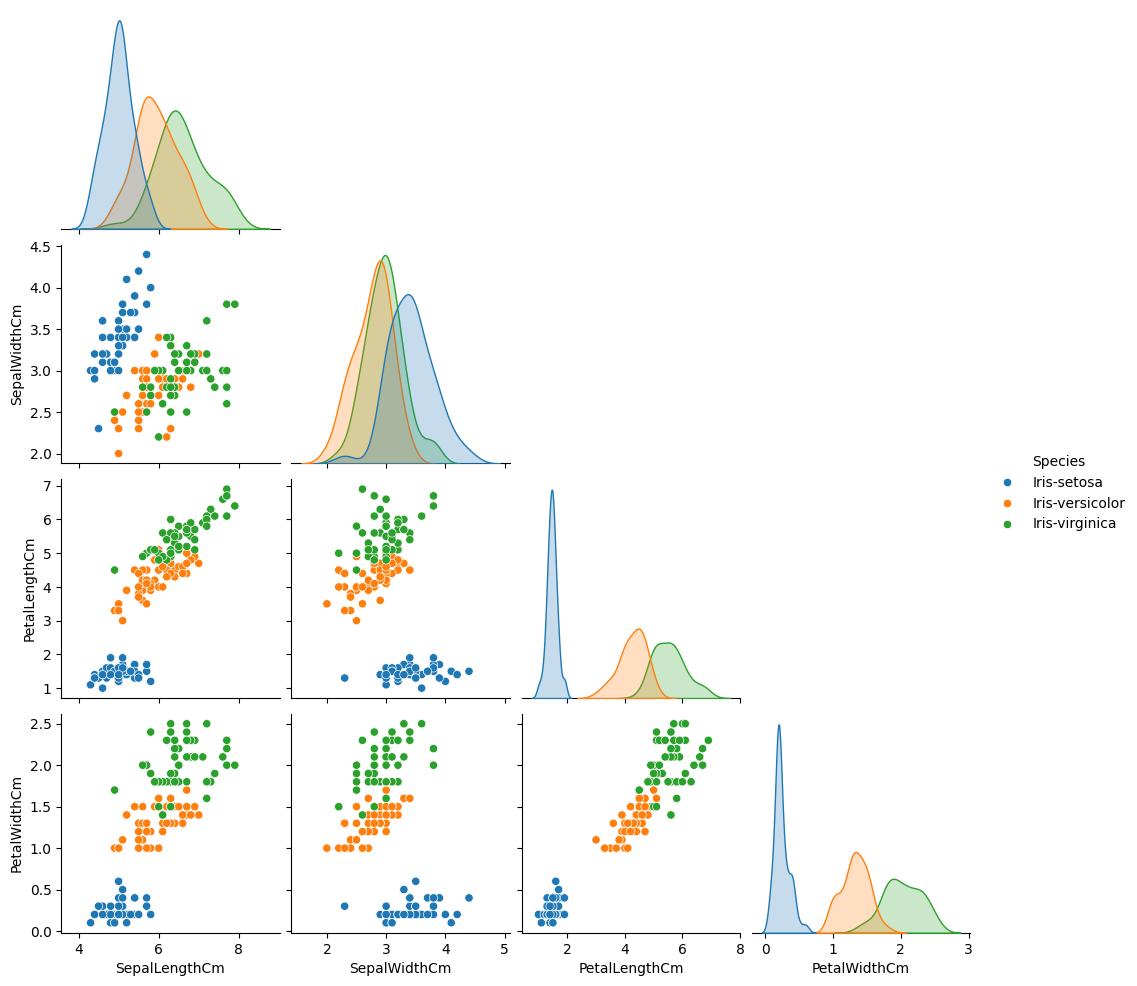

In [6]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Species', diag_kind='kde', corner=True)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

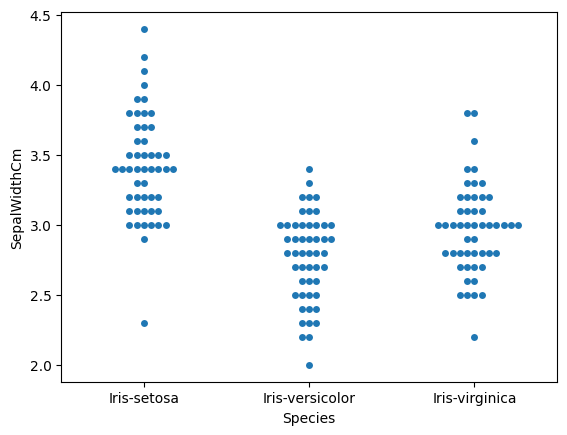

In [16]:
# Swarm plot for SepalWidthCm
sns.swarmplot(x='Species',y='SepalWidthCm',data=df)

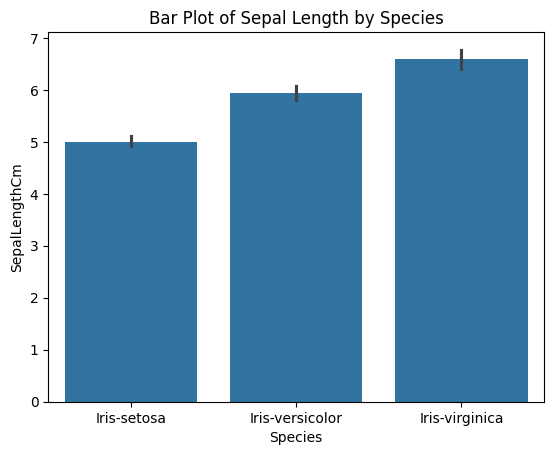

In [18]:
# Bar plot for SepalLengthCm
sns.barplot(x='Species', y='SepalLengthCm', data=df)
plt.title("Bar Plot of Sepal Length by Species")
plt.show()

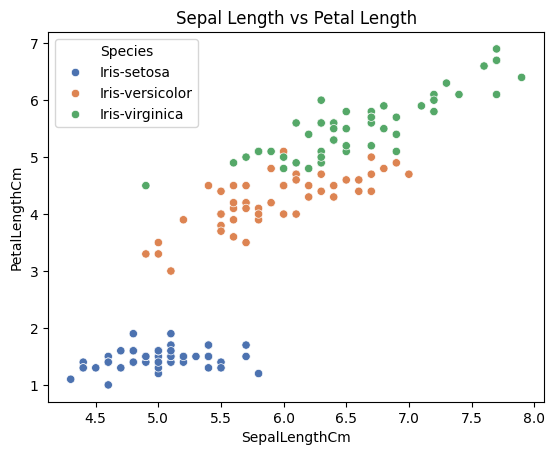

In [11]:
# Scatter plot of SepalLengthCm vs PetalLengthCm
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df, palette='deep')
plt.title("Sepal Length vs Petal Length")
plt.show()

## Coorelation Matrix

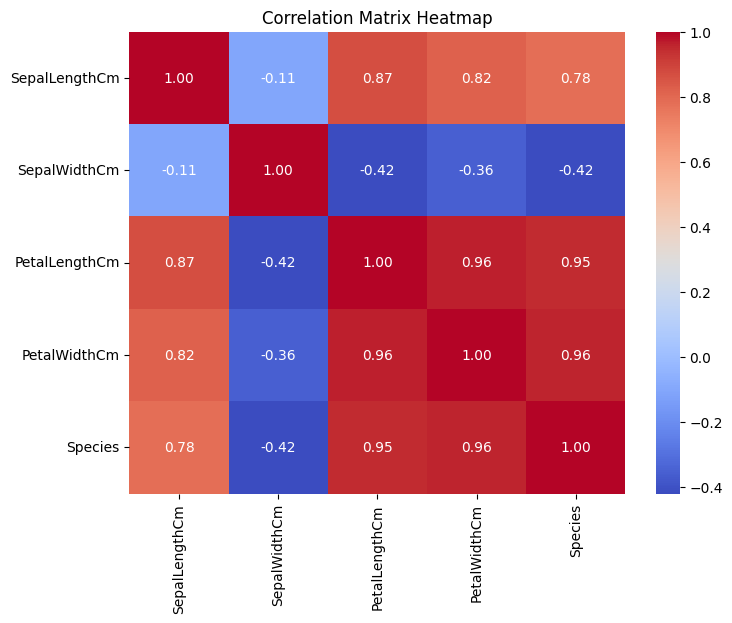

In [33]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Splitting Data into Training and Testing Sets

In [34]:
# Split the dataset into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

In [35]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


## Model Training

In [36]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [37]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Decode the predicted labels to their original names
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

In [40]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_))



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



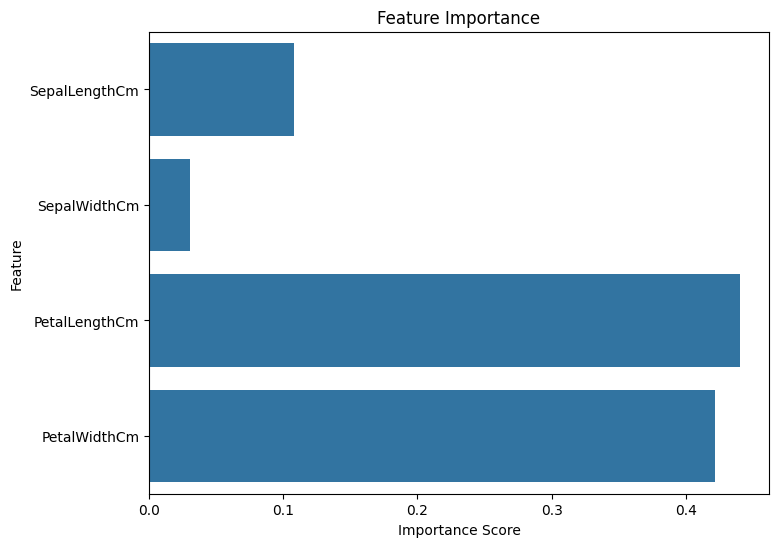

In [50]:
# Feature importance visualization
feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Confusion Matrix Heatmap


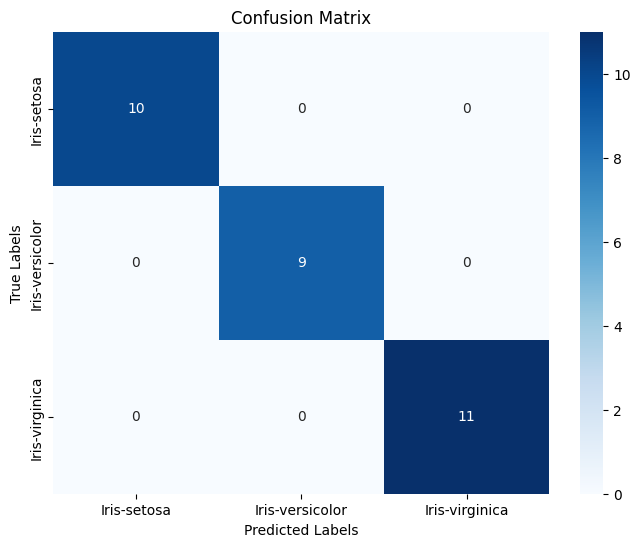

In [46]:
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Conclusion
